# Linear Regression 🏹

### After this session you should be able to 
- explain in your own words what Linear Regression does and be able to apply it to your own datasets
- benchmark your Linear Regression models to so-called "naïve" models
- understand and use the Scikit Learn framework for applying ML workflow (prep data, train a model, evaluate model, make predictions) - by using LinearRegression()
- interpret model metrics (e.g. R^2)
- explain in your own words what the pros and cons of Linear Regression are

In [2]:
import pandas as pd
import numpy as np
import random

from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

# Set the format of the visualizations
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

## Ingredients for linear regression model

* Regression: predicting a `continuous variable` (model assumption), not a class
* Linear: fitting a line through our data!  

The equation describing the **"true" linear relation between independent and dependent variables**:

$$
y = w_0 + w_1x + \epsilon
$$


* $w_0$ - intercept, also referred to as "bias" (intuition: the mean of the target variable y in the case we had no further information upon which to predict)
* $w_i$ - "slope"
* $x_i$ - features, independent variables
* $\epsilon$ are randomly distributed noise values. 

The **model equation**: a function we fit to the data    

$$\hat y = w_0 + w_1 x $$

the generalized model
$$\hat y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$
* $\hat y$ - dependent variable
* $x_i$ - features, independent variables


with 2+ features we are fitting a **hyperplane**.


shorthand linear algebraic notation with a coefficient vector $w$:
    
$$\hat y = w_0 + X \cdot w^T$$  
where X:features

To simulate data we have to choose some true values for $w_0$ and $w_1$. In order to do that, we need a "loss function".

## The loss function
* evaluates how our model is doing
$$ MSE = \frac{1}{N}\sum(y_{pred_i}-y_{true_i})^2$$ 

## Why does it make sense to "put a line" through our data?

In [5]:
# Base line model for linear regression!!
heights = pd.read_csv("heights.csv", sep = ",")
heights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


In [6]:
heights.head(2)

,Father,Son
0,65.04851,59.77827
1,63.25094,63.21404


Note that vals are `continous` (esp. values for "Son"-variable, which we want to predict).

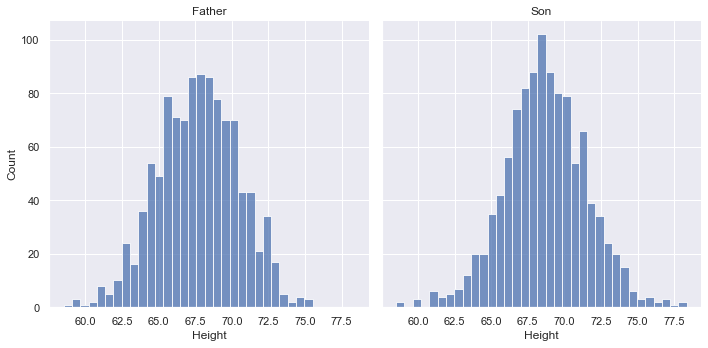

In [7]:
g = sns.displot(data=heights.melt(value_name="Height"),x="Height",col="variable")
g.set_titles(col_template='{col_name}')

Let's aggregate by mean and standard deviation:

In [8]:
heights['Son'].agg(["mean","std"]) # the errorbar =/pm 2*std ( confidence 95% )

mean    68.684070
std      2.814702
Name: Son, dtype: float64

We could predict the height of someone by focussing only on "Son"-data (i.e. by NOT taking into account the predictor variable, "Father"):
- 68.68 inches
- and would likely be right within 2 std of that value (approx. +/- 5.6 inches from the mean).

This is our **"naïve" 🤓 model**: simply by looking at the stats of the data of the dependent variable, we can already make predictions with a certain probability of being right.

Since LinReg assumes a `linear relation between independent and dependent vars`, let's scatterplot our data:

<AxesSubplot:xlabel='Father', ylabel='Son'>

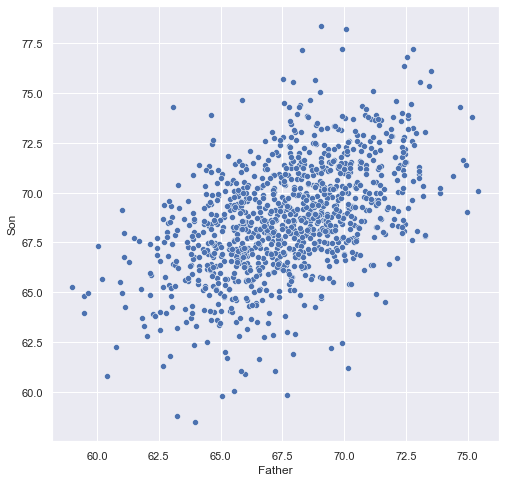

In [12]:
sns.scatterplot(
    data = heights,
    x = "Father",
    y = "Son",
)

So, qualitatively, the linearity assumption seems to be met. Let's use the data to quantify this linear relation and be able to make predictions. For this:
- first, let's create groups by which we then want to group by rounded height: 

In [16]:
heights['Heights_Groups_Father'] = round(heights['Father']).astype(int)
heights.head(2)

,Father,Son,Heights_Groups_Father
0,65.04851,59.77827,65
1,63.25094,63.21404,63


- now, let's aggregate by counts, mean and standard deviation for each height-group:

In [18]:
son_stats = heights.groupby(["Heights_Groups_Father"]).agg(
    {'Son': ["mean", "std", "count"]}
)
son_stats

Son                
                            mean       std count
Heights_Groups_Father                           
59                     64.669410  0.661594     3
60                     64.673850  2.776654     4
61                     65.930072  2.158895     8
62                     65.593267  1.775472    15
63                     66.514124  2.909974    36
64                     66.701389  2.307661    60
65                     67.223182  2.534444   101
66                     67.656250  2.350964   139
67                     68.139773  2.237706   134
68                     69.092820  2.760430   157
69                     69.443967  2.299950   142
70                     69.768448  2.489530   115
71                     70.540819  2.305104    77
72                     70.677187  2.329985    50
73                     72.049796  2.756266    28
74                     70.364610  0.445680     3
75                     71.720700  2.053495     6

- now plot average of y(x) ("average height of sons with a father of height x") for specific x_i ("height x of father") 

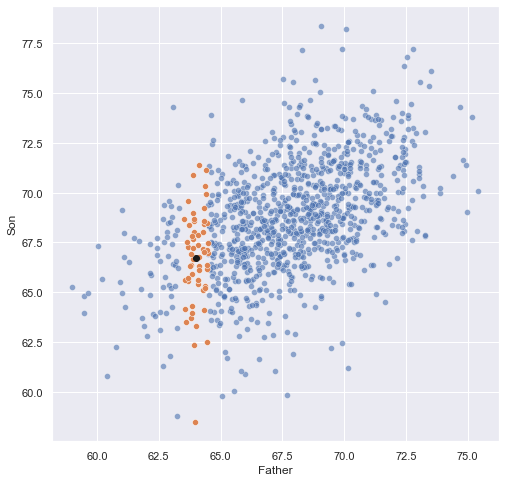

In [19]:
sns.scatterplot( data=heights.query("Heights_Groups_Father!=64"), x="Father", y="Son", alpha=0.6 )
sns.scatterplot( data=heights.query("Heights_Groups_Father==64"), x="Father", y="Son" )
plt.plot( son_stats.query("Heights_Groups_Father==64").Son["mean"], 'ok' )

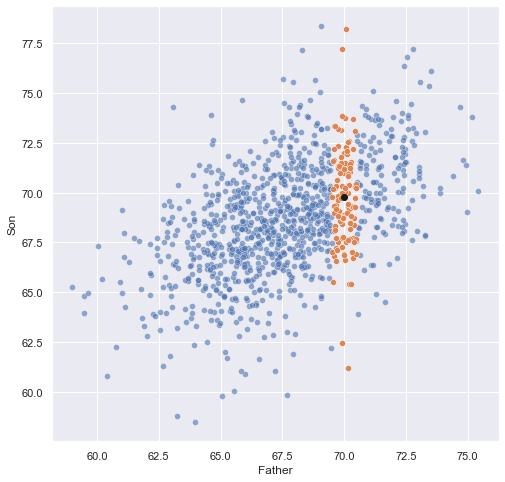

In [20]:
sns.scatterplot( data=heights.query("Heights_Groups_Father!=70"), x="Father", y="Son", alpha=0.6 )
sns.scatterplot( data=heights.query("Heights_Groups_Father==70"), x="Father", y="Son" )
plt.plot( son_stats.query("Heights_Groups_Father==70").Son["mean"], 'ok' )

- connect the black points:

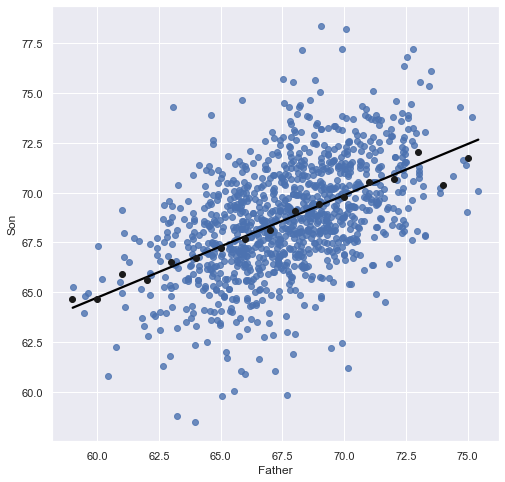

In [21]:
sns.regplot( data=heights, x="Father", y="Son",
                 ci=None, line_kws={"color": "black"})
plt.plot(son_stats.Son["mean"], 'ok')

We have obtained the **line of averages**!

Hence the term: "regression to mediocrity," (Francis Galton); we now summarize this regression effect more politely as "regression to the mean."

...if we **take into account the information of the independent variable** (as opposed to the naïve model approach) we can:
- make predictions by "point":

In [ ]:
son_stats = son_stats.reset_index()
son_stats 

Group        Son                
               mean       std count
0     59  64.669410  0.661594     3
1     60  64.673850  2.776654     4
2     61  65.930072  2.158895     8
3     62  65.593267  1.775472    15
4     63  66.514124  2.909974    36
5     64  66.701389  2.307661    60
6     65  67.223182  2.534444   101
7     66  67.656250  2.350964   139
8     67  68.139773  2.237706   134
9     68  69.092820  2.760430   157
10    69  69.443967  2.299950   142
11    70  69.768448  2.489530   115
12    71  70.540819  2.305104    77
13    72  70.677187  2.329985    50
14    73  72.049796  2.756266    28
15    74  70.364610  0.445680     3
16    75  71.720700  2.053495     6

Main takeaway: using our linear model, we are able to beat our baseline model in important ways:
- we can make "point" predictions (i.e. for each height group) and
- we have reduced variance of our predictions (approx. +/- 4.6 and/or +/-5 inches from the mean)!

Hence, we see that the linear model (represented here as the "line of averages") performs better in making predictions and reducing the variance (see this point again below, when R^2 is discussed!).

## But how do we know that this is the "best" line to make predictions?

## 2. Train a Linear Regression 🏹 Model

1. Fit a line to a series of points
2. Find the error of the line
3. Optimise the line's fit
4. Score your results

### How to fit a Linear Model? Two alternatives:

### 2.1. Closed-form solution

Analytical solution using the **Normal Equation**

* UGLY: we need to differentiate by **all** coefficients -> **partial derivative**
* set the first derivative to zero -> **vector of equations (Jacobian)**
* the second derivative has to be above zero -> **matrix of equations (Hessian)**

**EXPENSIVE TO CALCULATE**

### 2.2 Trial and error

Iterative approach, similar to the prep course.

For each iteration: 

* calculate the MSE error
* Change the parameters of the model
* Minimise the error using **Gradient Descent**

2.2.1 Manual implementation of a line

In [25]:
X = [np.random.randint(1,10)+0.01 for x in range(1000)]
X
len(X)

1000

Generating the theoretical line:
$$
y = w_0 + w_1x + \epsilon
$$

In [28]:
intercept = -1.5
slope = 2
noise = np.random.normal(0, 0.2)
ytrue = [slope * x + intercept +noise for x in X] 


In [38]:
ytrue

[6.688765819163535,
 4.688765819163535,
 8.688765819163535,
 0.688765819163536,
 6.688765819163535,
 12.688765819163535,
 0.688765819163536,
 2.6887658191635353,
 16.688765819163535,
 10.688765819163535,
 8.688765819163535,
 14.688765819163535,
 4.688765819163535,
 8.688765819163535,
 12.688765819163535,
 16.688765819163535,
 12.688765819163535,
 10.688765819163535,
 16.688765819163535,
 12.688765819163535,
 4.688765819163535,
 16.688765819163535,
 0.688765819163536,
 0.688765819163536,
 2.6887658191635353,
 6.688765819163535,
 6.688765819163535,
 10.688765819163535,
 12.688765819163535,
 2.6887658191635353,
 4.688765819163535,
 16.688765819163535,
 2.6887658191635353,
 6.688765819163535,
 4.688765819163535,
 14.688765819163535,
 12.688765819163535,
 4.688765819163535,
 2.6887658191635353,
 0.688765819163536,
 8.688765819163535,
 2.6887658191635353,
 8.688765819163535,
 10.688765819163535,
 0.688765819163536,
 8.688765819163535,
 14.688765819163535,
 4.688765819163535,
 16.688765819163

Generating the model line:

$$
\hat{y} = w_0 + w_1*x
$$

In [31]:

ypred = [slope * x + intercept for x in X] 

In [36]:
def make_line(xdata, slope, intercept):

    """Takes x values and returns a line with 
    intercept and slope
    """
    ypred = []
    for x in X:
        line =intercept +slope  * x
        ypred.append(line)

    return  ypred

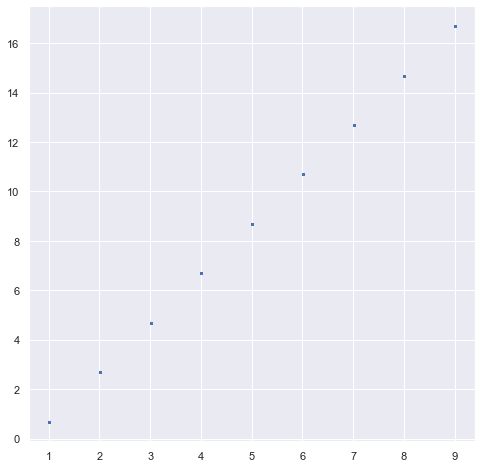

In [37]:
plt.scatter(X,  ytrue, s=0.8)
#plt.plot(X, make_line(xdata = X, slope = 1.974, intercept = -1.485))

2.2.2 Finding the "best line" using sklearn 

In [ ]:
m = LinearRegression()

In [ ]:
heights = heights.copy()
heights.columns

Index(['Father', 'Son', 'Group'], dtype='object')

In [ ]:
heights.drop(["Group"], axis = 1, inplace=True)
heights.columns

Index(['Father', 'Son'], dtype='object')

In [ ]:
X = heights[["Father"]]
y = heights["Son"]

In [ ]:
m.fit(X,y)

LinearRegression()

In [ ]:
m.coef_, m.intercept_

(array([0.51409304]), 33.886604354077924)

## 3. Evaluate a Linear Regression 🏹 Model

In [ ]:
m.score(X,y)

0.25134010224913705

Score you get from `m.score()` for linear regression is $R$^2
* it tells you how much variance in your data is explained by your model — high R^2 is good, because then most most of the variance in your data is explained by your model. 
* it tells you how much better your model is than predicting average $y$ — if R^2 = 0 => your model is no better than predicting an average value of $y$ 
* in our example, R^2 tells us that including "Father" as a predictor reduces the null model’s variability by about 25%
* it's similar to "accuracy" and can take vals < 0 (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

### MSE (see above):

* It is very sensitve to outliers - each residual is squared, so..
* residuals greater than one have a disproportionate big effect on outliers... 
* residuals less than one have a disproportionate small effect on outliers... 
* see also https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

### Alternatives:

* MAE - average of the absolute residuals. (less sensitive to outliers than the MSE)
* RMSLE - root-mean squared log error (doesn't penalise over-estimates as much as underestimates)

## Pros and Cons of the Linear Regression

Pros
* Easy to explain to third parties 
* It's faster than LogReg (which is already quite fast!)
* It can take a vast number of features
* It can be applied to a vast set of problems (including datasets which do not have linear relations)

Cons
* Assumption of linearity can also be confusing: model would predict if temperatures -> infinity => bike rentals -> infinity (no treshold)